In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/drive/MyDrive/credit_card_default.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


PREPROCESSING

In [5]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.553667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.518326,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
data.shape

(30000, 25)

In [7]:
data['MARRIAGE'].value_counts()

2    15964
1    13713
3      323
Name: MARRIAGE, dtype: int64

In [8]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

VISUALIZATION

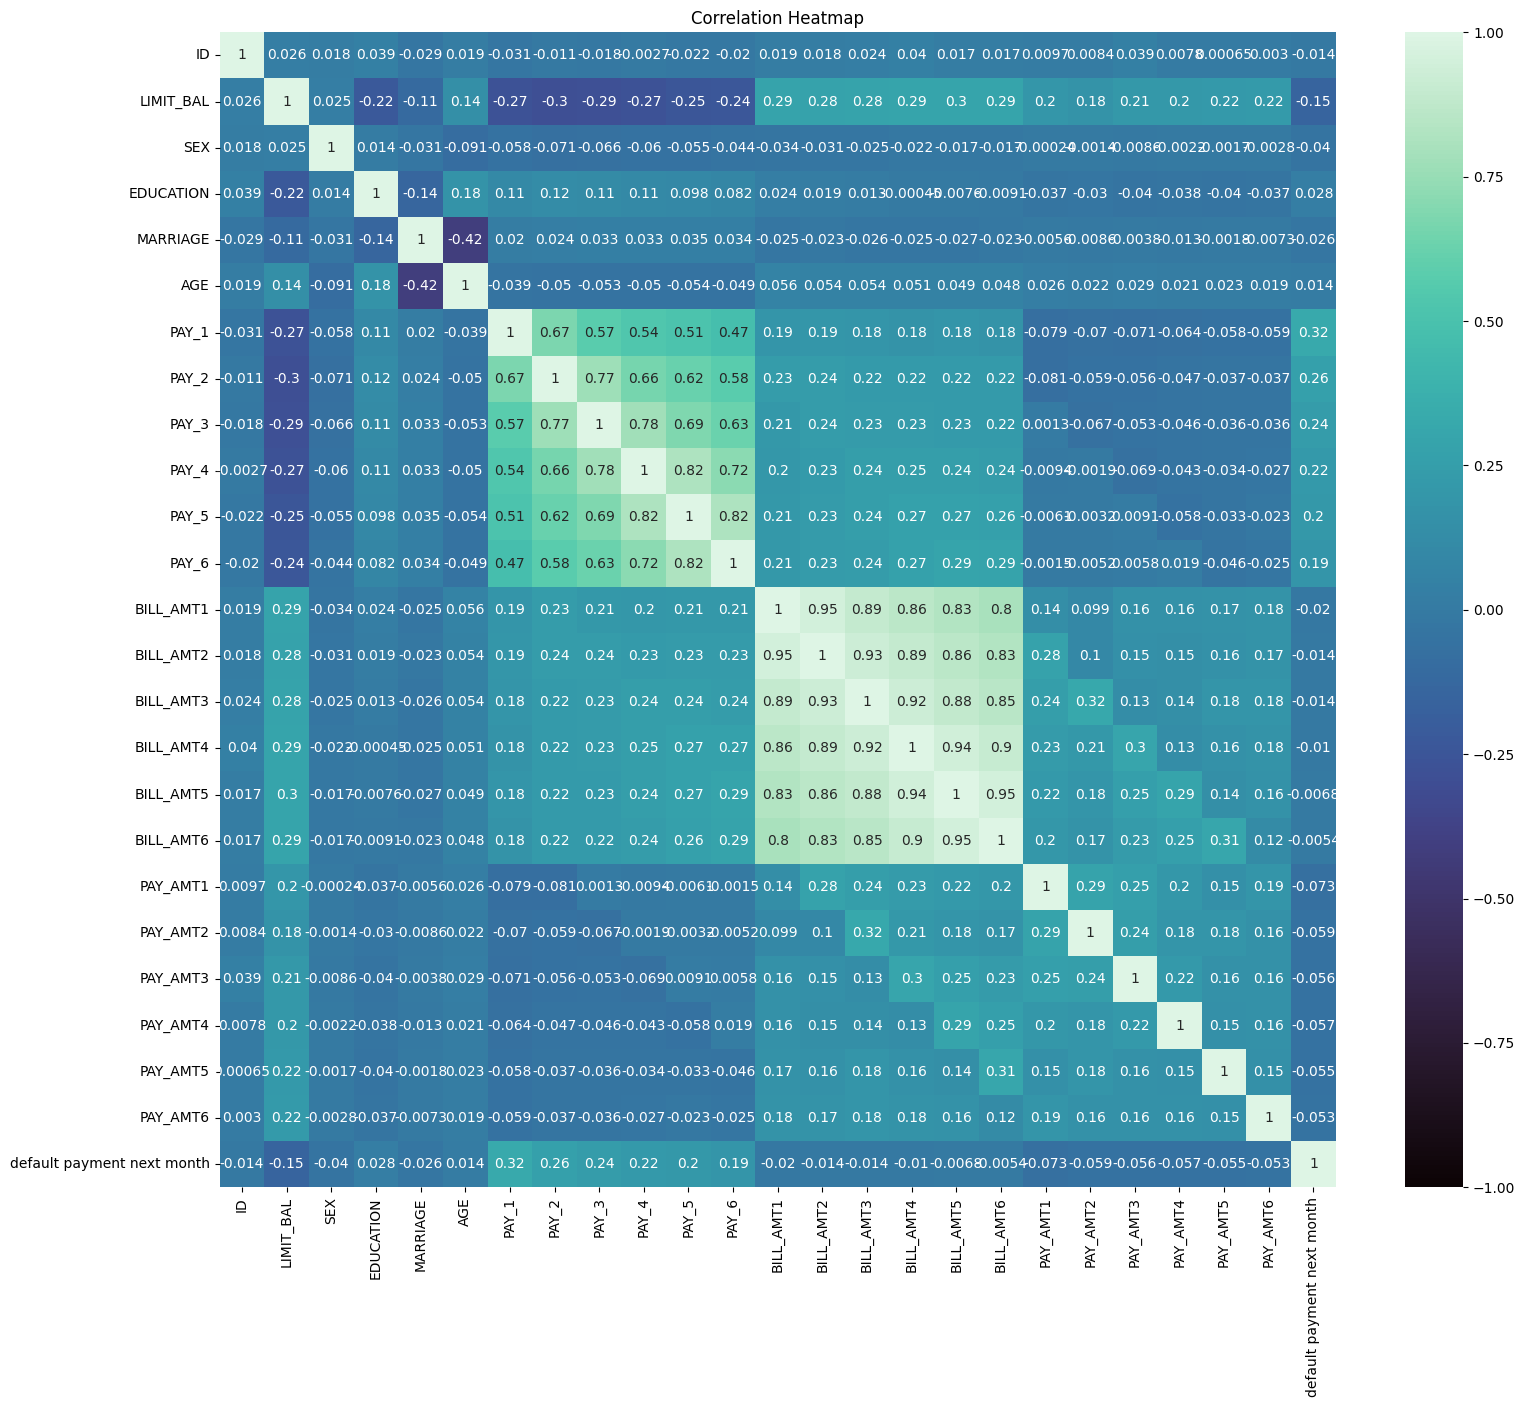

In [9]:
corr = data.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()


2.MISSING VALUES HANDLING

In [10]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
#There are no null values or missing values present in the dataset

In [12]:
data.rename(columns={'default payment next month': 'default_payment_next_month'}, inplace=True)
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [13]:
data['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [15]:
#Dropping the ID column as it is not important for analysis
data = data.drop(['ID'],axis = 1)
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [16]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [17]:
data['MARRIAGE'].value_counts()

2    15964
1    13713
3      323
Name: MARRIAGE, dtype: int64

In [18]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [19]:
x = data.drop(['default_payment_next_month'],axis = 1)
y = data['default_payment_next_month']

SCALING

In [20]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()

In [21]:
x.loc[:,['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] = mn.fit_transform(x[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']])

<ipython-input-21-b1eeeb6274cd>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.loc[:,['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',


In [22]:
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,1.0,0.333333,0.0,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,1.0,0.333333,0.5,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,1.0,0.333333,0.5,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,1.0,0.333333,0.0,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.0,0.333333,0.0,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


TRAIN-TEST SPLITTING OF DATA

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 42)

MODEL SELECTION

1.KNN CLASSIFICATION MODEL

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [26]:
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors :
  classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski' , p = 2)
  classifier.fit(x_train,y_train)
  y_pred_knn = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

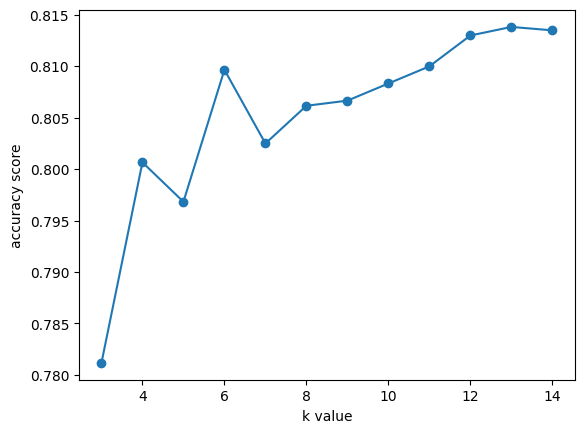

In [27]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid
plt.show()

In [28]:

classifier = KNeighborsClassifier(n_neighbors= 11,metric = 'minkowski',p =2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [29]:
y_pred_knn = classifier.predict(x_test)

In [30]:
confusion_matrix(y_test,y_pred_knn)

array([[4424,  263],
       [ 877,  436]])

In [31]:
accuracy_score(y_test,y_pred_knn)

0.81

In [32]:
precision_score(y_test,y_pred_knn)

0.6237482117310443

In [33]:
recall_score(y_test,y_pred_knn)

0.33206397562833206

SVM CLASSIFICATION MODEL

In [34]:
from sklearn.svm import SVC

In [35]:
sv = SVC(kernel = 'linear')

In [36]:
sv.fit(x_train,y_train)

SVC(kernel='linear')

In [37]:
y_pred_svm = sv.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred_svm)

0.8105

In [39]:
confusion_matrix(y_test,y_pred_svm)

array([[4560,  127],
       [1010,  303]])

In [40]:
sv1 = SVC(kernel = 'poly',degree = 3)
sv1.fit(x_train,y_train)
y_pred1 = sv1.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred1)

0.817

In [42]:
sv2 = SVC(kernel = 'rbf')
sv2.fit(x_train,y_train)
y_pred2 = sv2.predict(x_test)

In [43]:
accuracy_score(y_test,y_pred2)

0.8173333333333334

In [44]:
confusion_matrix(y_test,y_pred2)

array([[4489,  198],
       [ 898,  415]])

3.GRADIENTBOOST CLASSIFIER

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
grad_boost_clf = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=42)

In [47]:
grad_boost_clf.fit(x_test,y_test)

GradientBoostingClassifier(random_state=42)

In [48]:
y_pred_grad = grad_boost_clf.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred_grad)

0.8378333333333333

4.ADABOOST CLASSIFIER

In [50]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
ada_boost_clf = AdaBoostClassifier(n_estimators= 100)

In [52]:
ada_boost_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [53]:
y_pred_ada = ada_boost_clf.predict(x_test)

In [54]:
accuracy_score(y_test,y_pred_ada)

0.8161666666666667

5.XGBOOST CLASSIFIER

In [55]:
import xgboost as xgb

In [56]:
xg_boost_clf = xgb.XGBClassifier()

In [57]:
xg_boost_clf.fit(x_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
y_pred_xgb = xg_boost_clf.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred_xgb)

0.9723333333333334

KFOLD CROSS VALIDATION(for model selection)

In [60]:
from sklearn.model_selection import cross_val_score,KFold
model = KNeighborsClassifier()
kf = KFold(n_splits = 10)

In [61]:
score = cross_val_score(model,x,y,cv=kf)

In [62]:
print(score)

[0.77466667 0.79       0.778      0.77833333 0.788      0.78033333
 0.802      0.81833333 0.81366667 0.79733333]


In [63]:
print('average cross validation score = ',score.mean())

average cross validation score =  0.7920666666666667


In [64]:
from sklearn.model_selection import StratifiedKFold

In [65]:
skfold = StratifiedKFold(n_splits = 10)

In [66]:
skfold_score = cross_val_score(model,x,y,cv = skfold)

In [67]:
skfold_score

array([0.77566667, 0.78733333, 0.78466667, 0.779     , 0.792     ,
       0.78966667, 0.81033333, 0.80166667, 0.80266667, 0.79733333])

In [68]:
print('Average SKFold score =',skfold_score.mean())

Average SKFold score = 0.7920333333333335


In [69]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
kf = KFold(n_splits = 10)


In [70]:
score1 = cross_val_score(model,x,y,cv = kf)

In [71]:
print(score)

[0.77466667 0.79       0.778      0.77833333 0.788      0.78033333
 0.802      0.81833333 0.81366667 0.79733333]


In [72]:
print('average cross validation score = ',score.mean())

average cross validation score =  0.7920666666666667


In [73]:
model2 = AdaBoostClassifier()
kf = KFold(n_splits = 10)

In [74]:
score2 = cross_val_score(model2,x,y,cv = kf)

In [75]:
print(score2)

[0.80266667 0.811      0.80066667 0.801      0.812      0.814
 0.82733333 0.83933333 0.83466667 0.82366667]


In [76]:
print('average cross validation score = ',score2.mean())

average cross validation score =  0.8166333333333332


In [77]:
model3 = GradientBoostingClassifier()
kf = KFold(n_splits = 10)

In [ ]:
score3 = cross_val_score(model3,x,y,cv = kf)

In [ ]:
print(score3)

In [ ]:
print('average cross validation score = ',score3.mean())

In [ ]:
model4 = SVC()
kf = KFold(n_splits = 10)

In [ ]:
score4 = cross_val_score(model4,x,y,cv = kf)

In [ ]:
print(score4)

In [ ]:
print('average cross validation score = ',score4.mean())

HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
parameters= {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': np.linspace(0.8, 1.0, 5)
}

In [ ]:
random_search = RandomizedSearchCV(GradientBoostingClassifier(),
                                 param_distributions= parameters,
                                 n_iter=5,scoring='accuracy',
                                 n_jobs=-1,
                                 cv=5,
                                 verbose=3)
random_search.fit(x_train,y_train)
print('Best Params :',random_search.best_params_)
print('Best Score :',random_search.best_score_)

In [ ]:
grad_boost_clf = GradientBoostingClassifier(subsample= 0.95,n_estimators=150,min_samples_split= 5,min_samples_leaf = 2,max_depth = 3,learning_rate= 0.07333333333333333)

In [ ]:
grad_boost_clf.fit(x_test,y_test)

In [ ]:
y_pred_grad = grad_boost_clf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_grad)